<a href="https://colab.research.google.com/github/KiykoHanna/Simplon_CNN/blob/main/NLP_ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Partie 1 : Prétraitement & Vectorisation (Le Pipeline)

Avant qu'une machine puisse "lire", il faut nettoyer le texte. La qualité de vos résultats dépendra de la rigueur de cette étape.

* **Nettoyage avec NLTK** :
* Charger les données via la bibliothèque `datasets`.
* Créer une fonction `clean_text` qui réalise les opérations suivantes :
  * Passage en minuscules.
  * Suppression des caractères spéciaux et de la ponctuation (Regex).
  * Suppression des *stopwords* (mots vides sans valeur sémantique).
  * **Lemmatisation** : ramener les mots à leur racine (ex: *running* -> *run*).
  * **Vectorisation TF-IDF** :
    * Transformer votre texte nettoyé en une matrice numérique à l'aide de `TfidfVectorizer`.

In [1]:
# 1️⃣ Installer les bibliothèques nécessaires (Colab)


# 2️⃣ Importer les bibliothèques
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from datasets import load_dataset

c:\Users\Utilisateur\Simplon\CONV_NN\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

import pandas as pd

# 1. Téléchargement du dataset
# Le nom sur le hub est "dair-ai/emotion"
dataset = load_dataset("dair-ai/emotion")

# 2. Aperçu de la structure
print(dataset)

c:\Users\Utilisateur\Simplon\CONV_NN\.venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Utilisateur\.cache\huggingface\hub\datasets--dair-ai--emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 2000/2000 [00:00<00:00, 667723.31 examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [3]:
# Convertir en DataFrame pour plus de commodité
df = pd.DataFrame(dataset['train'])
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [5]:
stop_words = set(stopwords.words('english'))  # Dataset en anglais
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # 1. Minuscules
    text = text.lower()

    # 2. Supprimer ponctuation et caractères spéciaux
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenization
    tokens = nltk.word_tokenize(text)

    # 4. Suppression des stopwords
    tokens = [w for w in tokens if w not in stop_words]

    # 5. Lemmatisation
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    return ' '.join(tokens)

# Appliquer sur toutes les phrases
df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,label,clean_text
0,i didnt feel humiliated,0,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,feeling grouchy


In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

print("Shape TF-IDF:", X.shape)
print("Exemples de features:", vectorizer.get_feature_names_out()[:10])

Shape TF-IDF: (16000, 13462)
Exemples de features: ['aa' 'aaaaaaand' 'aaaaand' 'aaaand' 'aac' 'aahhh' 'aaron' 'ab' 'abandon'
 'abandoned']


In [7]:
from sklearn.cluster import KMeans

# On utilise la matrice TF-IDF X déjà créée
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)

kmeans.fit(X)

# Récupérer les clusters attribués à chaque message
df['cluster'] = kmeans.labels_

df.head()

,text,label,clean_text,cluster
0,i didnt feel humiliated,0,didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damned hopeful around some...,3
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,2,ever feeling nostalgic fireplace know still pr...,5
4,i am feeling grouchy,3,feeling grouchy,3


In [8]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline_nb = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       933
           1       0.62      0.98      0.76      1072
           2       1.00      0.05      0.09       261
           3       0.94      0.31      0.47       432
           4       0.93      0.22      0.36       387
           5       1.00      0.01      0.02       115

    accuracy                           0.67      3200
   macro avg       0.86      0.42      0.41      3200
weighted avg       0.76      0.67      0.60      3200



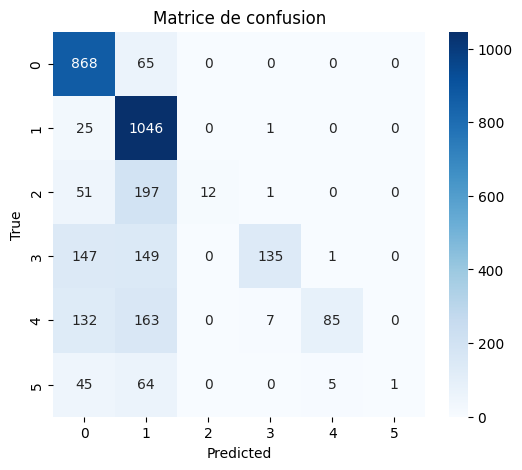

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = pipeline_nb.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matrice de confusion")
plt.show()


In [ ]:
test_sentences = [
    "I am not happy",
    "This is not bad"
]

predictions = pipeline_nb.predict(test_sentences)

for sent, pred in zip(test_sentences, predictions):
    print(f"{sent} → Predicted label: {pred}")


I am not happy → Predicted label: 1
This is not bad → Predicted label: 0
